In [38]:
# Import necessary libraries for building a CNN with TensorFlow and download CIFAR-100 dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [39]:
# List physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("🚀 GPU(s) detected!")
    for gpu in gpus:
        print(f" - {gpu}")
    print("TensorFlow will use the GPU by default when available.")
else:
    print("⚠️ No GPU detected. Using CPU only.")

🚀 GPU(s) detected!
 - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
TensorFlow will use the GPU by default when available.


Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


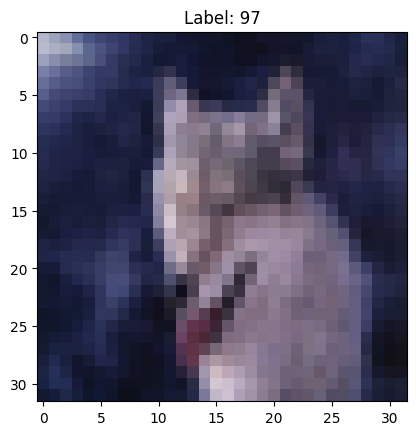

In [40]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split training data into training and validation sets (e.g., 80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

# ...existing code...

# Display the first image and label as a sample
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

In [41]:
# Design a simple CNN model for CIFAR-100
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.BatchNormalization(),
    # Second convolutional block
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.BatchNormalization(),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.BatchNormalization(),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Print model summary
model.summary()

/home/paul/AIGC550_Advanced_Deep_Learning_Lab06_CNN/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,316 (1.41 MB)

 Trainable params: 368,868 (1.41 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0105 - loss: 5.1736 - val_accuracy: 0.0118 - val_loss: 4.8567 - learning_rate: 1.0000e-06
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0128 - loss: 5.0383 - val_accuracy: 0.0133 - val_loss: 4.8668 - learning_rate: 7.0711e-07
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0135 - loss: 4.9490 - val_accuracy: 0.0145 - val_loss: 4.8248 - learning_rate: 4.0825e-07
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0148 - loss: 4.9236 - val_accuracy: 0.0149 - val_loss: 4.8046 - learning_rate: 2.0412e-07
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0168 - loss: 4.9069 - val_accuracy: 0.0154 - val_loss: 4.7972 - learning_rate: 9.1287e-08
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0152 - loss: 4.8934 - val_accuracy: 0.0152 - val_loss: 4.7935 - learning_rate: 3.7268e-08
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy:

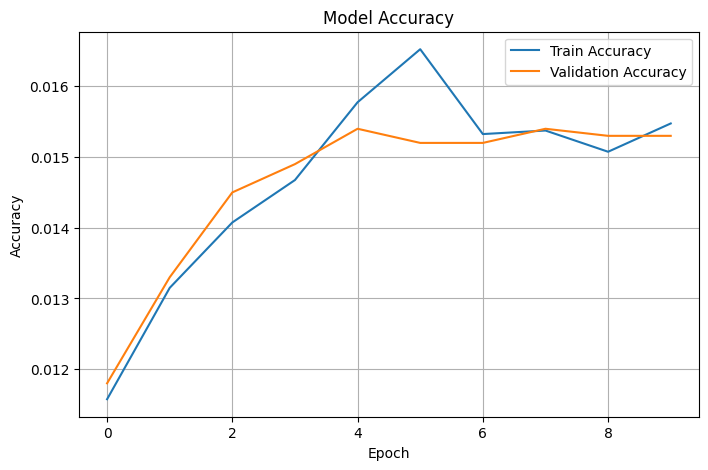

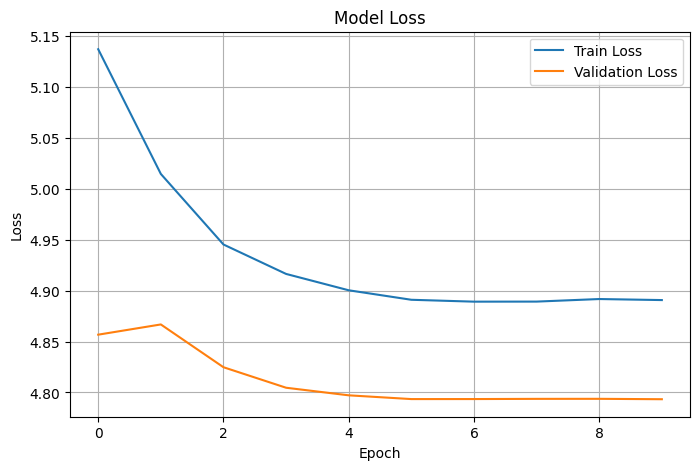

In [42]:
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Create the scheduler callback
# Learning rate scheduler
def scheduler(epoch, lr):
    return lr / np.sqrt(epoch + 1)

lr_callback = LearningRateScheduler(scheduler)

# Configure the optimizer with a custom learning rate
learning_rate = 1e-6
optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model and record training history
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[lr_callback],
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import pandas as pd
import datetime

# Extract accuracy and loss history
history_df = pd.DataFrame({
    'Epoch': range(1, len(history.history['accuracy']) + 1),
    'Train Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Train Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Model architecture specs for reference
model_specs = (
    "Model Specs:\n"
    "- Conv2D: 3x3 kernel, stride 1, ReLU, padding='same'\n"
    "- MaxPooling2D: 2x2 pool, stride 2, padding='same'\n"
    "- BatchNormalization after each Conv block\n"
    "- 3 Conv blocks: 32, 64, 128 filters\n"
    "- Dense: 128 units, ReLU\n"
    "- Dropout: 0.2\n"
    "- Output: 100 units, softmax\n"
    "- Optimizer: Adam (learning_rate=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-7)\n"
    "- Learning Rate Scheduler: LearningRateScheduler (lr / sqrt(epoch+1))\n"
    "- Loss: Sparse Categorical Crossentropy\n"
    "- Epochs: 10, Batch size: 64"
)

# Get current time for unique filename
now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"training_history_table_with_specs_{now}.png"

# Save the table as a PNG image with model specs
import matplotlib.pyplot as plt
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Add the table
tbl = table(ax, history_df.round(4), loc='center', colWidths=[0.13]*len(history_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Add model specs as text above the table
plt.text(0, 1.15, model_specs, fontsize=10, ha='left', va='top', transform=ax.transAxes, family='monospace')

plt.savefig(filename, bbox_inches='tight', dpi=200)
plt.close()

print(f"Training history table with model specs saved as '{filename}'.")

Training history table with model specs saved as 'training_history_table_with_specs_20250613_144236.png'.
